In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
from config import weather_api_key
from datetime import datetime
import time 


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
longs = np.random.uniform(-90, 90, size = 1500)
lat_long = zip(lats, longs)
lat_long

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_long)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate [0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [23]:
#open weather url request
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid="+ weather_api_key


In [24]:
#Create a empty list to hold weather data
cityData=[]

#Print the beginning of the loggin
print("Beginning Data Retrieval     ")
print("------------------------------")

#Create counters
recordCount = 1
setCount =1 

#Loop through all cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        setCount += 1
        recordCount = 1
    #create endpoint url with each city
    cityUrl = url + "&q=" + city.replace(" ", "+")
    
    #log the URL, record, and set numbers and the city
    print(f"Processing Record {recordCount} of Set {setCount} | {city}")
    recordCount += 1
    
#Run an API request for each city

    try:
        #Parse JSON and retrieve data
        cityWeather = req.get(cityUrl).json()
        #Parse out needed data
        cityLat = cityWeather["coord"]["lat"]
        cityLong = cityWeather["coord"]["lon"]
        cityMaxTemp = cityWeather["main"]["temp_max"]
        cityHumidity = cityWeather["main"]["humidity"]
        cityClouds = cityWeather["clouds"]["all"]
        cityWind = cityWeather["wind"]["speed"]
        cityCountry = cityWeather["sys"]["country"]
        #convert date to ISO standard
        cityDate = datetime.utcfromtimestamp(cityWeather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append city info into cityData list
        cityData.append({"City": city.title(),
                        "Lat":cityLat,
                        "Lng": cityLong,
                        "Max Temp": cityMaxTemp,
                        "Humidity": cityHumidity,
                        "Cloudiness": cityClouds,
                        "Wind Speed": cityWind,
                        "Country": cityCountry,
                        "Date": cityDate})

    #If an error occurs, skip city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate data loading is complete    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | ihosy
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | tres arroyos
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | pichayevo
Processing Record 10 of Set 1 | la rioja
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | beachwood
Processing Record 13 of Set 1 | umm kaddadah
Processing Record 14 of Set 1 | zurrieq
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | n

Processing Record 33 of Set 4 | ostersund
Processing Record 34 of Set 4 | carutapera
Processing Record 35 of Set 4 | tsienyane
City not found. Skipping...
Processing Record 36 of Set 4 | viedma
Processing Record 37 of Set 4 | serenje
Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | lere
Processing Record 40 of Set 4 | olafsvik
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | nouakchott
Processing Record 43 of Set 4 | boden
Processing Record 44 of Set 4 | abu samrah
Processing Record 45 of Set 4 | chambas
Processing Record 46 of Set 4 | harper
Processing Record 47 of Set 4 | velikie luki
City not found. Skipping...
Processing Record 48 of Set 4 | koroni
Processing Record 49 of Set 4 | bangassou
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | zyryanovsk
Processing Record 2 of Set 5 | raga
Processing Record 3 of Set 5 | mogadishu
Processing Record 4 of Set 5 | stranda
Processing Record 5 of Set 5 | garissa
Proce

Processing Record 25 of Set 8 | chlorakas
Processing Record 26 of Set 8 | idil
Processing Record 27 of Set 8 | osakarovka
Processing Record 28 of Set 8 | sesvete
Processing Record 29 of Set 8 | gazni
City not found. Skipping...
Processing Record 30 of Set 8 | kita
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | sembe
Processing Record 33 of Set 8 | rio gallegos
Processing Record 34 of Set 8 | bamako
Processing Record 35 of Set 8 | nynashamn
Processing Record 36 of Set 8 | strezhevoy
Processing Record 37 of Set 8 | manitouwadge
Processing Record 38 of Set 8 | phalodi
Processing Record 39 of Set 8 | oksfjord
Processing Record 40 of Set 8 | copiapo
Processing Record 41 of Set 8 | slatina
Processing Record 42 of Set 8 | otjimbingwe
Processing Record 43 of Set 8 | findlay
Processing Record 44 of Set 8 | tazovskiy
Processing Record 45 of Set 8 | ilo
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | eyl
Processing Record 48 of Set 8 | sharjah
Proces

Processing Record 13 of Set 12 | harstad
Processing Record 14 of Set 12 | walvis bay
Processing Record 15 of Set 12 | marzuq
Processing Record 16 of Set 12 | bargal
City not found. Skipping...
Processing Record 17 of Set 12 | skole
Processing Record 18 of Set 12 | altay
Processing Record 19 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 20 of Set 12 | kolda
Processing Record 21 of Set 12 | meulaboh
Processing Record 22 of Set 12 | zhezkazgan
Processing Record 23 of Set 12 | abrau-dyurso
Processing Record 24 of Set 12 | sergeyevka
Processing Record 25 of Set 12 | bud
Processing Record 26 of Set 12 | ilhabela
Processing Record 27 of Set 12 | lima
Processing Record 28 of Set 12 | mercedes
Processing Record 29 of Set 12 | ipameri
Processing Record 30 of Set 12 | bereda
Processing Record 31 of Set 12 | borba
Processing Record 32 of Set 12 | tralee
Processing Record 33 of Set 12 | santa cruz
Processing Record 34 of Set 12 | les herbiers
Processing Record 35 of Set 12

In [25]:
len(cityData) #left off at 6.2.6, info won't save to citydata array

570

In [26]:
#Convert array to df
cityData_df = pd.DataFrame(cityData)
cityData_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,51.82,100,90,18.41,AR,2021-09-08 08:09:09
1,Tasiilaq,65.6145,-37.6368,44.76,57,0,12.10,GL,2021-09-08 08:16:14
2,Nanortalik,60.1432,-45.2371,44.98,70,100,3.60,GL,2021-09-08 08:16:14
3,Ihosy,-22.4000,46.1167,80.89,34,0,3.20,MG,2021-09-08 08:16:15
4,Vardo,70.3705,31.1107,41.20,75,75,6.91,NO,2021-09-08 08:16:15
5,Tres Arroyos,-38.3739,-60.2798,48.76,96,100,19.57,AR,2021-09-08 08:16:15
6,Port Elizabeth,-33.9180,25.5701,69.10,63,0,5.75,ZA,2021-09-08 08:16:16
7,Pichayevo,53.2363,42.2032,60.67,47,100,14.56,RU,2021-09-08 08:16:16
8,La Rioja,42.2500,-2.5000,66.04,53,84,0.65,ES,2021-09-08 08:16:17
9,Narsaq,60.9167,-46.0500,41.22,59,88,3.80,GL,2021-09-08 08:16:17


In [27]:
#Create output file
outputDataFile = "weatherData/cities.csv"
#Export cityData into a CSV
cityData_df.to_csv(outputDataFile, index_label = "City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = cityData_df["Lat"]
maxTemps = cityData_df["Max Temp"]
humidity = cityData_df["Humidity"]
cloudiness = cityData_df["Cloudiness"]
windSpeed = cityData_df["Wind Speed"]

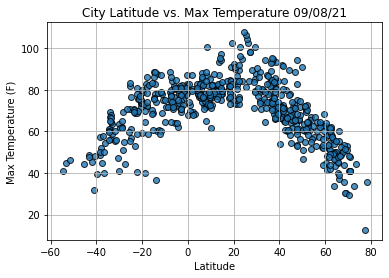

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            maxTemps,
            edgecolor = "black", linewidths=1,
            marker="o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weatherData/Fig1.png")

plt.show()

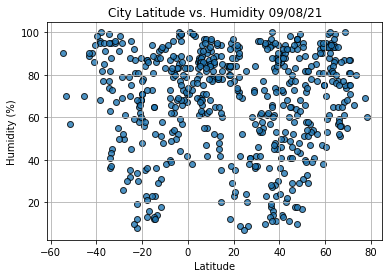

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor = "black", linewidths=1,
            marker="o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weatherData/Fig2.png")

plt.show()

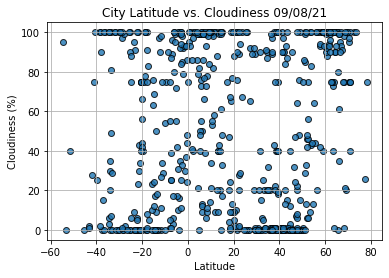

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolor = "black", linewidths=1,
            marker="o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weatherData/Fig3.png")

plt.show()

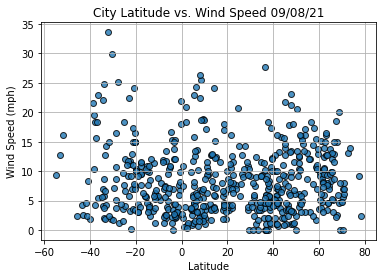

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
            windSpeed,
            edgecolor = "black", linewidths=1,
            marker="o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weatherData/Fig4.png")

plt.show()

In [78]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress

def plotLinearReg(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value,p_value,std_err)=linregress(x_values,y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regressValues = x_values *slope+intercept
    #Get the equations of the line
    lineEq = "y= "+str(round(slope,2))+"x + "+str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regressValues, "r")
    # Annotate the text for the line equation.
    plt.annotate(lineEq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
northernHemi_df = cityData_df.loc[(cityData_df["Lat"] >=0)]
southernHemi_df = cityData_df.loc[(cityData_df["Lat"] < 0)]

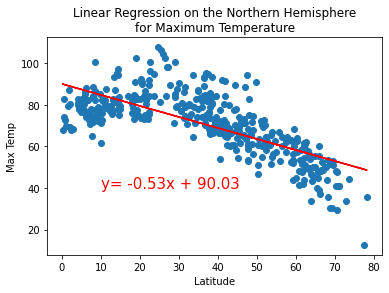

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northernHemi_df["Lat"]
y_values = northernHemi_df["Max Temp"]

#Call the function
plotLinearReg(x_values, y_values, 
             'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 
              'Max Temp', (10,40))

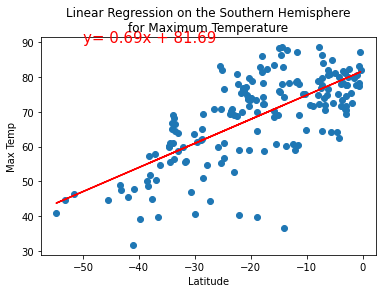

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southernHemi_df["Lat"]
y_values = southernHemi_df["Max Temp"]

#Call the function
plotLinearReg(x_values, y_values, 
             f'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
              'Max Temp', (-50,90))

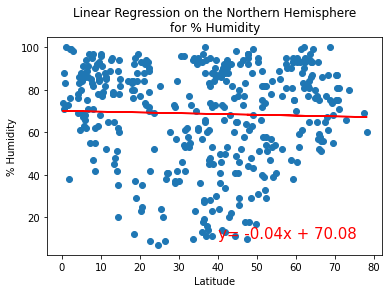

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northernHemi_df["Lat"]
y_values = northernHemi_df["Humidity"]
# Call the function.
plotLinearReg(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
              '% Humidity',(40,10))

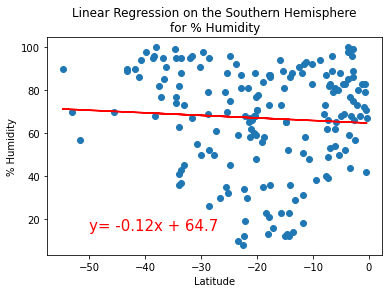

In [83]:
# Linear regression on the Northern Hemisphere
x_values = southernHemi_df["Lat"]
y_values = southernHemi_df["Humidity"]
# Call the function.
plotLinearReg(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', 
              '% Humidity',(-50,15))

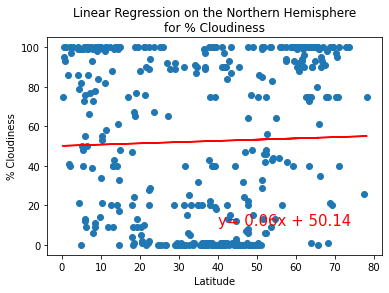

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northernHemi_df["Lat"]
y_values = northernHemi_df["Cloudiness"]
# Call the function.
plotLinearReg(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
             '% Cloudiness', (40,10))

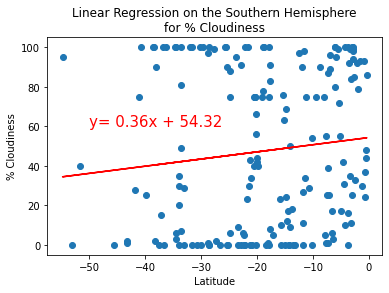

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southernHemi_df["Lat"]
y_values = southernHemi_df["Cloudiness"]
# Call the function.
plotLinearReg(x_values, y_values, 'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
             '% Cloudiness', (-50,60))

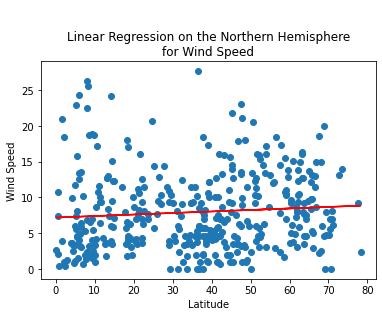

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northernHemi_df["Lat"]
y_values = northernHemi_df["Wind Speed"]
# Call the function.
plotLinearReg(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(40,35))

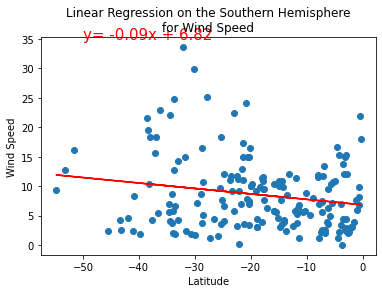

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southernHemi_df["Lat"]
y_values = southernHemi_df["Wind Speed"]
# Call the function.
plotLinearReg(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(-50,35))